# Linear Regression Slope (LRS)

https://library.tradingtechnologies.com/trade/chrt-ti-linear-regression-slope.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = 'reliance.ns'
symbol2 = '^nsei'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# View Columns
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,1503.745972,1512.760498,1491.363403,1495.424927,1480.595825,6463060
2020-01-02 00:00:00+05:30,1497.802368,1526.480469,1497.802368,1520.883545,1505.802124,8173308
2020-01-03 00:00:00+05:30,1518.605103,1527.173950,1508.699097,1522.716187,1507.616455,9684434
2020-01-06 00:00:00+05:30,1505.727173,1513.552979,1483.933838,1487.400879,1472.651367,11315596
2020-01-07 00:00:00+05:30,1504.736572,1520.091064,1499.288208,1510.284058,1495.307617,7699489


In [4]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [5]:
avg1 = df1['Adj Close'].mean()
avg2 = df2['Adj Close'].mean()
df1['AVGS1_S1'] = avg1 - df1['Adj Close']
df1['AVGS2_S2'] = avg2 - df2['Adj Close']
df1['Average_SQ'] = df1['AVGS1_S1']**2
df1['AVG_AVG'] = df1['AVGS1_S1']*df1['AVGS2_S2']

In [6]:
sum_sq = df1['Average_SQ'].sum()
sum_avg = df1['AVG_AVG'].sum()
slope = sum_avg/sum_sq
intercept = avg2-(slope*avg1)

In [7]:
m = (df1['Adj Close']-df1['Adj Close'].mean())*(df2['Adj Close']-df2['Adj Close'].mean())/(df1['Adj Close']-df1['Adj Close'].mean())

In [8]:
n = 20
df1['Slope'] = m.rolling(n).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

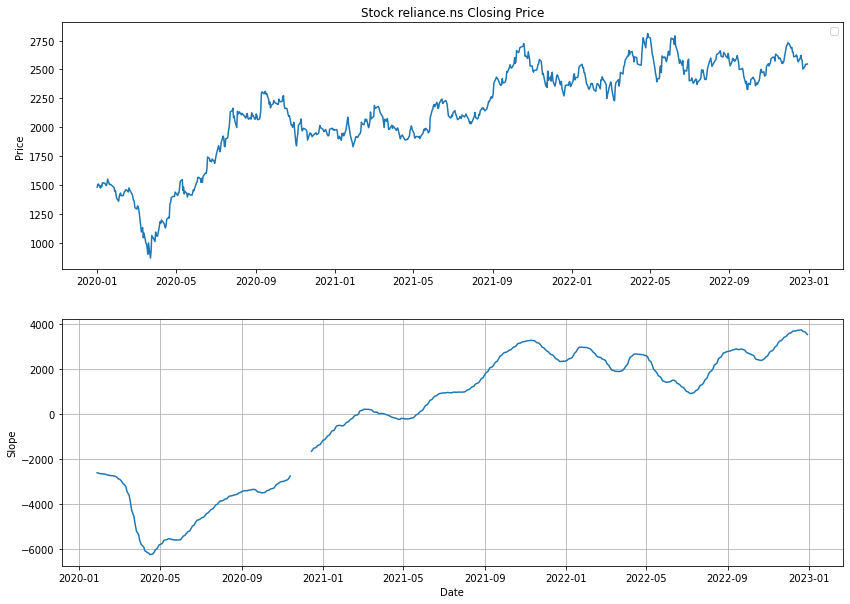

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
#df1['VolumePositive'] = df1['Open'] < df1['Adj Close']
#colors = df1.VolumePositive.map({True: 'g', False: 'r'})
#ax2.bar(df1.index, df1['Volume'], color=colors, alpha=0.4)
ax2.plot(df1['Slope'], label='Slope')
ax2.grid()
ax2.set_ylabel('Slope')
ax2.set_xlabel('Date')

## Candlestick with Linear Regression Slope

In [10]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,AVGS1_S1,AVGS2_S2,Average_SQ,AVG_AVG,Slope,VolumePositive
0,18261.770833,1503.745972,1512.760498,1491.363403,1495.424927,1480.595825,6463060,664.857956,2616.096445,442036.102192,1.739333e+06,NaN,False
1,18262.770833,1497.802368,1526.480469,1497.802368,1520.883545,1505.802124,8173308,639.651658,2516.396250,409154.243038,1.609617e+06,NaN,True
2,18263.770833,1518.605103,1527.173950,1508.699097,1522.716187,1507.616455,9684434,637.837327,2571.946055,406836.455102,1.640483e+06,NaN,False
3,18266.770833,1505.727173,1513.552979,1483.933838,1487.400879,1472.651367,11315596,672.802414,2805.546641,452663.088836,1.887579e+06,NaN,False
4,18267.770833,1504.736572,1520.091064,1499.288208,1510.284058,1495.307617,7699489,650.146164,2745.646250,422690.035097,1.785071e+06,NaN,False


Text(0.5, 0, 'Date')

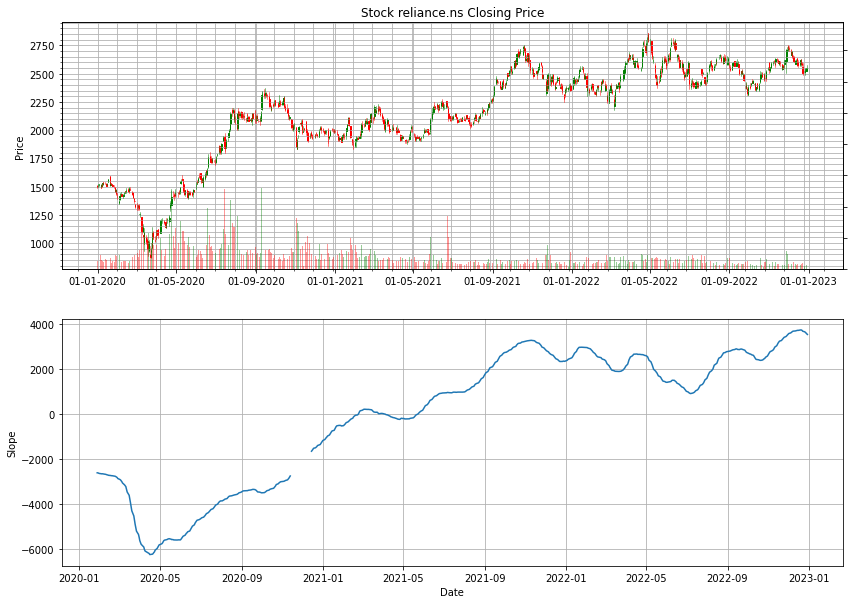

In [12]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
#df1['VolumePositive'] = df1['Open'] < df1['Adj Close']
#colors = df1.VolumePositive.map({True: 'g', False: 'r'})
#ax2.bar(df1.index, df1['Volume'], color=colors, alpha=0.4)
ax2.plot(df1['Slope'], label='Slope')
ax2.grid()
ax2.set_ylabel('Slope')
ax2.set_xlabel('Date')